# Proyecto 2 - Juan Sebastian Cifuentes
## Crypto Market - Data Analytics

### ETL

In [169]:
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression

# Obtenemos los datos de las 100 monedas con mejor capitalización del mercado de la API CoinGecko
url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=100&page=1&sparkline=false&price_change_percentage=24h%2C7d%2C14d%2C30d%2C200d%2C1y&locale=en"
response = requests.get(url)
data = response.json()

# Creamos un DataFrame con los datos
df = pd.DataFrame(data)

# Imprimimos las primeras 5 filas del DataFrame
df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_14d_in_currency,price_change_percentage_1y_in_currency,price_change_percentage_200d_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26040.000000,506129179091,1,5.460193e+11,1.493597e+10,26183.000000,...,38264.56805,2013-07-06T00:00:00.000Z,None,2023-08-23T14:48:08.937Z,-12.797664,20.992443,10.812892,0.151796,-10.827870,-10.476815
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1652.470000,198235153931,2,1.982352e+11,1.259444e+10,1657.330000,...,380958.91406,2015-10-20T00:00:00.000Z,"{'times': 83.85151362165706, 'currency': 'btc'...",2023-08-23T14:48:08.857Z,-11.159897,0.984741,-1.899062,-0.213378,-10.734960,-9.283316
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999299,82746484853,3,8.274648e+10,1.643189e+10,1.004000,...,74.45674,2015-03-02T00:00:00.000Z,None,2023-08-23T14:45:00.518Z,0.019256,-0.137273,-0.063340,-0.037038,-0.243426,-0.034070
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,214.580000,32957579428,4,4.284207e+10,7.826151e+08,216.380000,...,538125.08077,2017-10-19T00:00:00.000Z,None,2023-08-23T14:48:02.352Z,-12.295076,-28.135052,-35.222656,3.696502,-10.056596,-7.894960
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.521386,27494874605,5,5.203237e+10,1.050434e+09,0.522798,...,19278.82500,2014-05-22T00:00:00.000Z,None,2023-08-23T14:48:04.240Z,-20.948118,51.252348,26.201094,1.855170,-24.964106,-11.959969


### Diccionario de Datos

| Columna | df | Descripción |
|---------|--------|-------------|
| id | Si | Identificador único de la criptomoneda |
| symbol | Si | Símbolo de la criptomoneda |
| name | Si | Nombre de la criptomoneda |
| image | Si | URL de la imagen de la criptomoneda |
| current_price | Si | Precio actual de la criptomoneda en USD |
| market_cap | Si | Capitalización de mercado de la criptomoneda en USD |
| market_cap_rank | Si | Clasificación de la criptomoneda por capitalización de mercado |
| fully_diluted_valuation | Si | Valoración diluida de la criptomoneda en USD |
| total_volume | Si | Volumen total de negociación de la criptomoneda en las últimas 24 horas |
| high_24h | No | Precio más alto de la criptomoneda en las últimas 24 horas |
| low_24h | No | Precio más bajo de la criptomoneda en las últimas 24 horas |
| price_change_24h | Si | Cambio de precio de la criptomoneda en las últimas 24 horas |
| price_change_percentage_24h | Si | Porcentaje de cambio de precio de la criptomoneda en las últimas 24 horas |
| market_cap_change_24h | Si | Cambio de capitalización de mercado de la criptomoneda en las últimas 24 horas |
| market_cap_change_percentage_24h | Si | Porcentaje de cambio de capitalización de mercado de la criptomoneda en las últimas 24 horas |
| circulating_supply | Si | Suministro circulante de la criptomoneda |
| total_supply | Si | Suministro total de la criptomoneda |
| max_supply | Si | Suministro máximo de la criptomoneda |
| ath | Si | Precio más alto histórico de la criptomoneda |
| ath_change_percentage | Si | Porcentaje de cambio del precio más alto histórico de la criptomoneda |
| ath_date | Si | Fecha del precio más alto histórico de la criptomoneda |
| atl | Si | Precio más bajo histórico de la criptomoneda |
| atl_change_percentage | Si | Porcentaje de cambio del precio más bajo histórico de la criptomoneda |
| atl_date | Si | Fecha del precio más bajo histórico de la criptomoneda |
| roi.times | No | Número de veces que la inversión se ha multiplicado |
| roi.currency | No | Moneda en la que se ha calculado el ROI |
| roi.percentage | Si | Porcentaje de retorno de la inversión (ROI) |
| last_updated | Si | Fecha de la última actualización de los datos |


In [170]:
# Función para desanidar la columna 'roi'
def extract_percentage(row):
    return row['percentage'] if row is not None else None

# Aplicar las funciones a cada fila para crear la columna 'roi.percentage'
df['roi.percentage'] = df['roi'].apply(extract_percentage)

# Eliminar las columnas que no vamos a usar para el proyecto de Data Analytics
df = df.drop(columns=['roi','high_24h','low_24h'])

df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,price_change_24h,...,atl_change_percentage,atl_date,last_updated,price_change_percentage_14d_in_currency,price_change_percentage_1y_in_currency,price_change_percentage_200d_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency,roi.percentage
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26040.000000,506129179091,1,5.460193e+11,1.493597e+10,39.470000,...,38264.56805,2013-07-06T00:00:00.000Z,2023-08-23T14:48:08.937Z,-12.797664,20.992443,10.812892,0.151796,-10.827870,-10.476815,NaN
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1652.470000,198235153931,2,1.982352e+11,1.259444e+10,-3.533542,...,380958.91406,2015-10-20T00:00:00.000Z,2023-08-23T14:48:08.857Z,-11.159897,0.984741,-1.899062,-0.213378,-10.734960,-9.283316,8385.151362
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999299,82746484853,3,8.274648e+10,1.643189e+10,-0.000370,...,74.45674,2015-03-02T00:00:00.000Z,2023-08-23T14:45:00.518Z,0.019256,-0.137273,-0.063340,-0.037038,-0.243426,-0.034070,NaN
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,214.580000,32957579428,4,4.284207e+10,7.826151e+08,7.650000,...,538125.08077,2017-10-19T00:00:00.000Z,2023-08-23T14:48:02.352Z,-12.295076,-28.135052,-35.222656,3.696502,-10.056596,-7.894960,NaN
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.521386,27494874605,5,5.203237e+10,1.050434e+09,0.009496,...,19278.82500,2014-05-22T00:00:00.000Z,2023-08-23T14:48:04.240Z,-20.948118,51.252348,26.201094,1.855170,-24.964106,-11.959969,NaN


In [171]:
# Revismos la calidad de las columnas e integridad de los datos
df.info()

# Resultado:
# Se identifica que las crypto que tienen vacía la columna 'max_supply' es porque todavía pueden minar más monedas.
# Se determina eliminar la columna 'roi.percentage' debido a que no hay suficiente data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        100 non-null    object 
 1   symbol                                    100 non-null    object 
 2   name                                      100 non-null    object 
 3   image                                     100 non-null    object 
 4   current_price                             100 non-null    float64
 5   market_cap                                100 non-null    int64  
 6   market_cap_rank                           100 non-null    int64  
 7   fully_diluted_valuation                   94 non-null     float64
 8   total_volume                              100 non-null    float64
 9   price_change_24h                          100 non-null    float64
 10  price_change_percentage_24h            

In [172]:
# Eliminar la columna 'roi.percentage'
df = df.drop(columns=['roi.percentage'])

In [174]:
# Rellenar los None con el valor del 'market_cap' para poder predecir el riesgo
df['fully_diluted_valuation'].fillna(df['market_cap'], inplace=True)
# asignar 0 a los valores None indicando que no hubo variación para poder calcular el riesgo
df['price_change_percentage_14d_in_currency'].fillna(0, inplace=True)
df['price_change_percentage_1y_in_currency'].fillna(0, inplace=True)
df['price_change_percentage_200d_in_currency'].fillna(0, inplace=True)
df['price_change_percentage_24h_in_currency'].fillna(0, inplace=True)
df['price_change_percentage_30d_in_currency'].fillna(0, inplace=True)
df['price_change_percentage_7d_in_currency'].fillna(0, inplace=True)


In [175]:
# Importamos las biblioteca de Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Seleccionamos las columnas de datos que vamos a utilizar
features = ["price_change_percentage_14d_in_currency", "price_change_percentage_1y_in_currency",
            "price_change_percentage_200d_in_currency", "price_change_percentage_24h_in_currency",
            "price_change_percentage_30d_in_currency", "price_change_percentage_7d_in_currency",
            "current_price", "market_cap" ,"total_volume", "fully_diluted_valuation"]

# Seleccionamos la columna de datos que queremos predecir
target = 'market_cap'

# Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2)

# Entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecimos el porcentaje de riesgo para el conjunto de prueba
y_pred = model.predict(X_test)

# Crear la columna de risk_percentage con las predicciones del modelo
df["risk_percentage_predicted"] = model.predict(df[features])

# Evaluamos el modelo
print("Score del modelo:", model.score(X_test, y_test))
df.head()

Score del modelo: 1.0


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,price_change_24h,...,atl_change_percentage,atl_date,last_updated,price_change_percentage_14d_in_currency,price_change_percentage_1y_in_currency,price_change_percentage_200d_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency,risk_percentage_predicted
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26040.000000,506129179091,1,5.460193e+11,1.493597e+10,39.470000,...,38264.56805,2013-07-06T00:00:00.000Z,2023-08-23T14:48:08.937Z,-12.797664,20.992443,10.812892,0.151796,-10.827870,-10.476815,5.061292e+11
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1652.470000,198235153931,2,1.982352e+11,1.259444e+10,-3.533542,...,380958.91406,2015-10-20T00:00:00.000Z,2023-08-23T14:48:08.857Z,-11.159897,0.984741,-1.899062,-0.213378,-10.734960,-9.283316,1.982352e+11
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999299,82746484853,3,8.274648e+10,1.643189e+10,-0.000370,...,74.45674,2015-03-02T00:00:00.000Z,2023-08-23T14:45:00.518Z,0.019256,-0.137273,-0.063340,-0.037038,-0.243426,-0.034070,8.274648e+10
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,214.580000,32957579428,4,4.284207e+10,7.826151e+08,7.650000,...,538125.08077,2017-10-19T00:00:00.000Z,2023-08-23T14:48:02.352Z,-12.295076,-28.135052,-35.222656,3.696502,-10.056596,-7.894960,3.295758e+10
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.521386,27494874605,5,5.203237e+10,1.050434e+09,0.009496,...,19278.82500,2014-05-22T00:00:00.000Z,2023-08-23T14:48:04.240Z,-20.948118,51.252348,26.201094,1.855170,-24.964106,-11.959969,2.749487e+10


### EDA

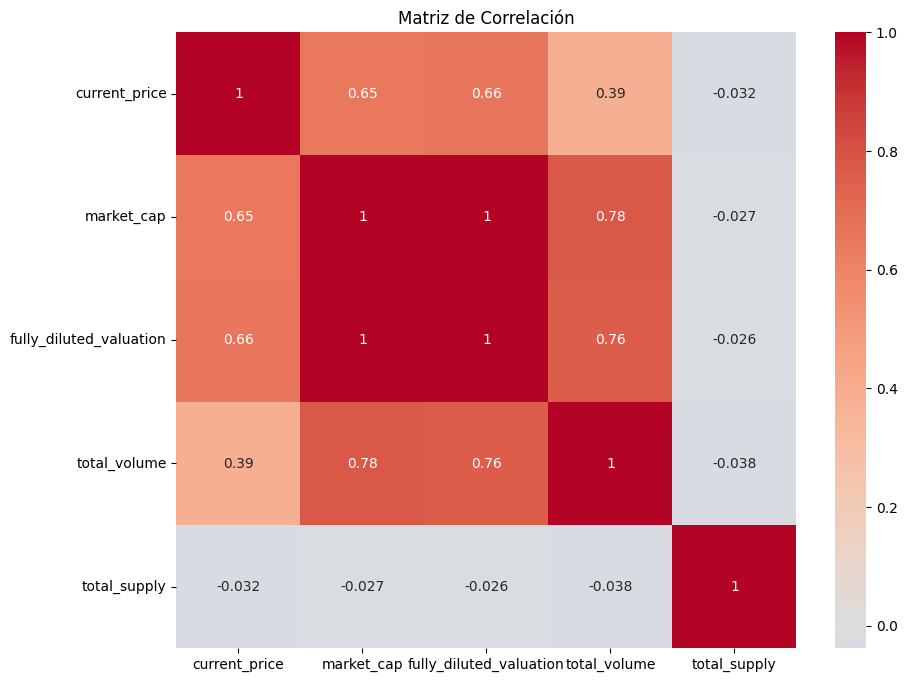

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas para la matriz de correlación
columns = ['current_price', 'market_cap', 'fully_diluted_valuation', 'total_volume','total_supply']

# Filtrar el DataFrame con las columnas seleccionadas
df_selected = df[columns]

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Crear una figura y eje
plt.figure(figsize=(10, 8))

# Generar el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Configurar el título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

#### Análisis
En la matriz se observa una alta correlación entre las variables analizadas, a excepción del total de monedas en circulación 'total_supply', se puede concluir que más influyente es el volumen de monedas en negociación 'total_volumen'.

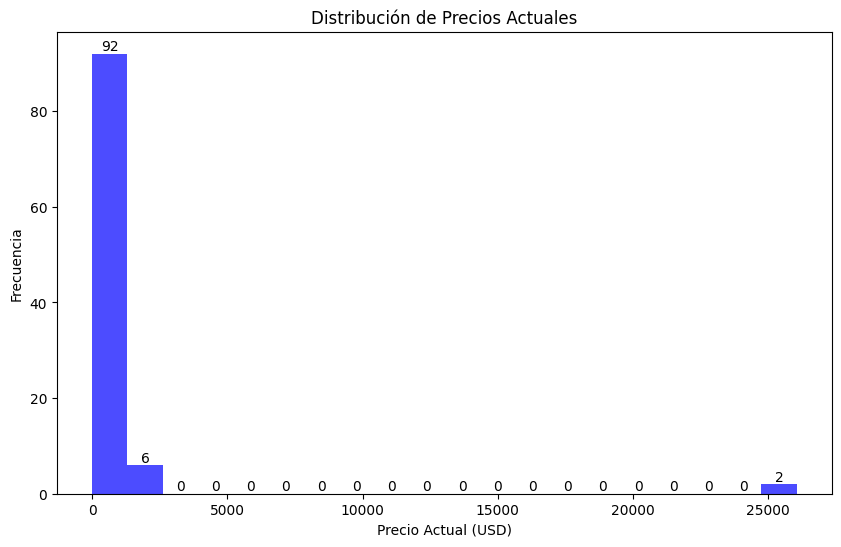

In [188]:
import matplotlib.pyplot as plt

# Histograma del precio actual (current_price)
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df['current_price'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Precio Actual (USD)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios Actuales')

# Calcular los valores centrales de cada bin
bin_centers = (bins[:-1] + bins[1:]) / 2

# Agregar etiquetas de datos
for value, frequency in zip(bin_centers, hist):
    plt.text(value, frequency, str(int(frequency)), ha='center', va='bottom', fontsize=10)

plt.show()

#### Análisis
De las 100 crytos con mayor capitalización en el mercado 96 tienen un precio actual por debajo de los 3000 USD y 2 tienen un precio por encima de 24000 USD con un distribución 98% y 2% respectivamente.

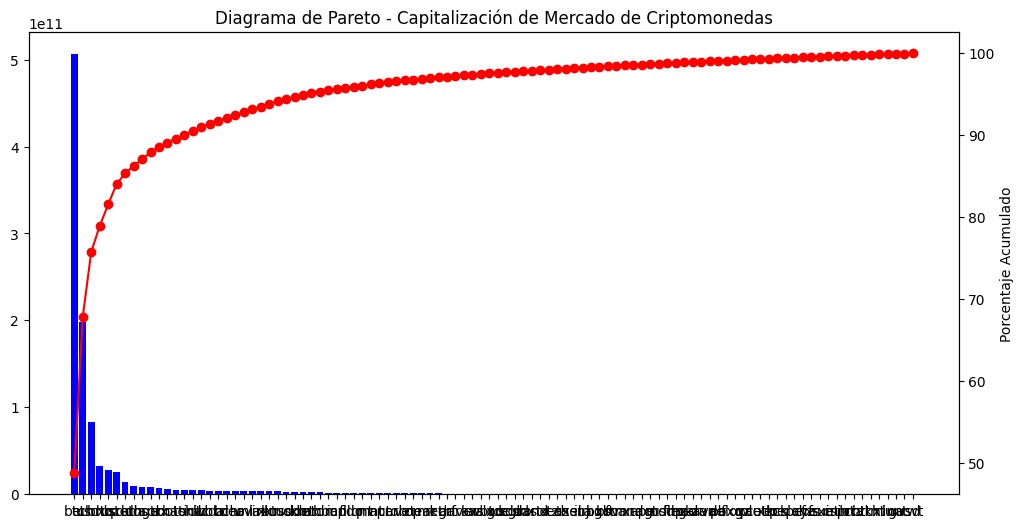

In [179]:
import matplotlib.pyplot as plt

# Calcular la suma de capitalización de mercado por criptomoneda
cryptocurrency_market_cap = df.groupby('symbol')['market_cap'].sum()

# Ordenar las criptomonedas por capitalización de mercado descendente
sorted_cryptocurrencies = cryptocurrency_market_cap.sort_values(ascending=False)

# Calcular el porcentaje acumulado
cumulative_percentage = sorted_cryptocurrencies.cumsum() / sorted_cryptocurrencies.sum() * 100

# Crear el gráfico de Pareto
plt.figure(figsize=(12, 6))
ax1 = plt.bar(sorted_cryptocurrencies.index, sorted_cryptocurrencies.values, color='blue')
ax2 = plt.twinx()
ax2.plot(sorted_cryptocurrencies.index, cumulative_percentage, color='red', marker='o')

# Configurar ejes y etiquetas
plt.xlabel('Criptomoneda')
plt.ylabel('Capitalización de Mercado (USD)')
ax2.set_ylabel('Porcentaje Acumulado')
plt.title('Diagrama de Pareto - Capitalización de Mercado de Criptomonedas')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [180]:
from tabulate import tabulate

# Calcular la suma de capitalización de mercado por criptomoneda
cryptocurrency_market_cap = df.groupby('symbol')['market_cap'].sum()

# Ordenar las criptomonedas por capitalización de mercado descendente
sorted_cryptocurrencies = cryptocurrency_market_cap.sort_values(ascending=False)

# Calcular el porcentaje acumulado
cumulative_percentage = sorted_cryptocurrencies.cumsum() / sorted_cryptocurrencies.sum() * 100

# Crear un DataFrame con los datos
data = {'Criptomoneda': sorted_cryptocurrencies.index, 'Capitalización de Mercado (USD)': sorted_cryptocurrencies.values, 'Porcentaje Acumulado': cumulative_percentage.values}
table_df = pd.DataFrame(data)

# Imprimir la tabla usando tabulate
table = tabulate(table_df, headers='keys', tablefmt='grid', showindex=False)
print(table)

+----------------+-----------------------------------+------------------------+
| Criptomoneda   |   Capitalización de Mercado (USD) |   Porcentaje Acumulado |
+================+===================================+========================+
| btc            |                      506129179091 |                48.6836 |
+----------------+-----------------------------------+------------------------+
| eth            |                      198235153931 |                67.7515 |
+----------------+-----------------------------------+------------------------+
| usdt           |                       82746484853 |                75.7107 |
+----------------+-----------------------------------+------------------------+
| bnb            |                       32957579428 |                78.8809 |
+----------------+-----------------------------------+------------------------+
| xrp            |                       27494874605 |                81.5255 |
+----------------+----------------------

#### Análisis
De las 100 Cryptos con mayor capitalización Bitcoin, Etherium, Tether, binancecoin y ripple representan el 80% de la capitalización respecto el total.

/tmp/ipykernel_6516/3942056303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['circulating_percent'] = df_filtered['circulating_supply'] / df_filtered['total_supply'] * 100
/tmp/ipykernel_6516/3942056303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['remaining_percent'] = 100 - df_filtered['circulating_percent']


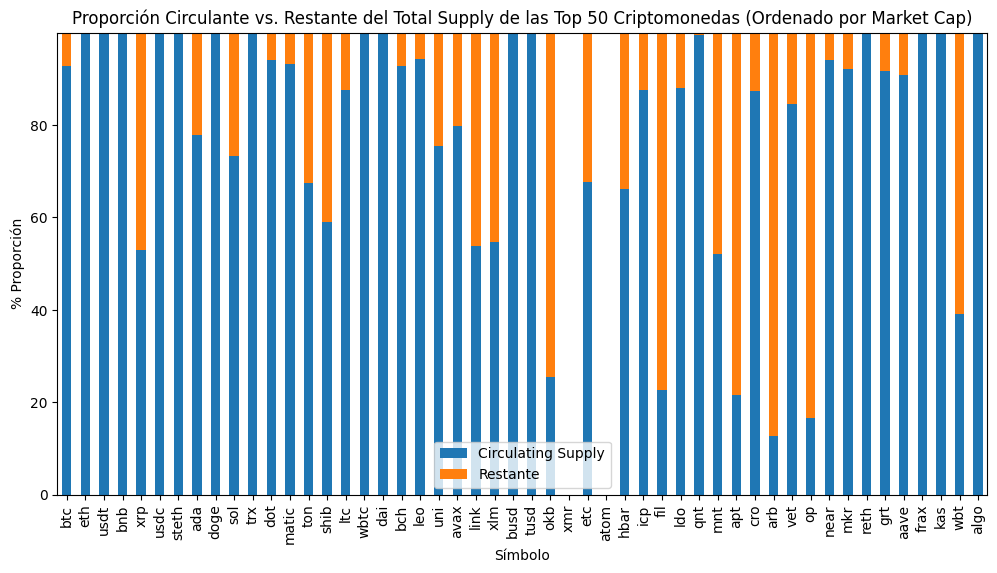

In [183]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para tener solo las columnas necesarias
df_filtered = df[['symbol', 'circulating_supply', 'total_supply','market_cap']]

# Calcular la proporción circulante
df_filtered['circulating_percent'] = df_filtered['circulating_supply'] / df_filtered['total_supply'] * 100

# Calcular la proporción restante
df_filtered['remaining_percent'] = 100 - df_filtered['circulating_percent']

# Ordenar el DataFrame por 'market_cap' en orden descendente
df_sorted = df_filtered.sort_values(by='market_cap', ascending=False)

# Tomar solo los primeros 50 registros (top 50)
df_top_50 = df_sorted.head(50)

# Crear una figura y un eje
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Graficar las columnas apiladas al 100%
df_top_50.plot(x='symbol', y=['circulating_percent', 'remaining_percent'], kind='bar', stacked=True, ax=ax)

# Configurar etiquetas y título
plt.xlabel('Símbolo')
plt.ylabel('% Proporción')
plt.title('Proporción Circulante vs. Restante del Total Supply de las Top 50 Criptomonedas (Ordenado por Market Cap)')

# Configurar leyenda
plt.legend(["Circulating Supply", "Restante"])

# Mostrar el gráfico
plt.show()

### Análisis
En esta gráfica se observan las cryptos con mayor demanda la cual está representada por el valor porcentual de 'circulating_supply' que representa el suministro circulante de los tokens o cryptos respecto el total.

/tmp/ipykernel_6516/2683342100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['market_cap_percent'] = df_filtered['market_cap'] / df_filtered['fully_diluted_valuation'] * 100
/tmp/ipykernel_6516/2683342100.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rest_percent'] = 100 - df_filtered['market_cap_percent']


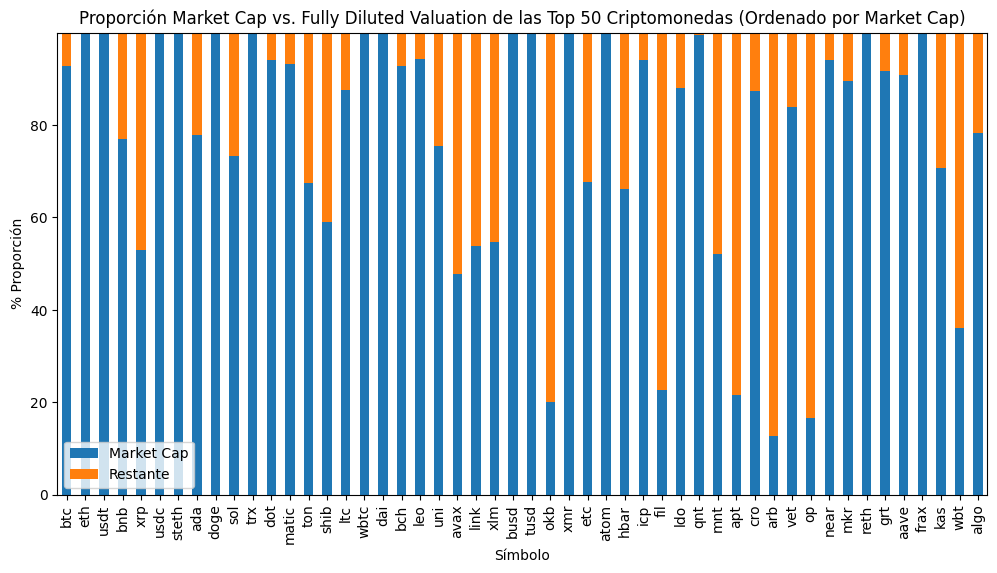

In [184]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para tener solo las columnas necesarias
df_filtered = df[['symbol', 'market_cap', 'fully_diluted_valuation']]

# Calcular la proporción porcentual
df_filtered['market_cap_percent'] = df_filtered['market_cap'] / df_filtered['fully_diluted_valuation'] * 100

# Calcular la proporción restante
df_filtered['rest_percent'] = 100 - df_filtered['market_cap_percent']

# Ordenar el DataFrame por 'market_cap' en orden descendente
df_sorted = df_filtered.sort_values(by='market_cap', ascending=False)

# Tomar solo los primeros 50 registros (top 50)
df_top_50 = df_sorted.head(50)

# Crear una figura y un eje
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Graficar las columnas apiladas al 100%
df_top_50.plot(x='symbol', y=['market_cap_percent', 'rest_percent'], kind='bar', stacked=True, ax=ax)

# Configurar etiquetas y título
plt.xlabel('Símbolo')
plt.ylabel('% Proporción')
plt.title('Proporción Market Cap vs. Fully Diluted Valuation de las Top 50 Criptomonedas (Ordenado por Market Cap)')

# Configurar leyenda
plt.legend(["Market Cap", "Restante"])

# Mostrar el gráfico
plt.show()

#### Análisis
A diferencia del gráfico anterior, aquí podemos visualizar la estimación de la capitalización de mercado de una criptomoneda si todas las posibles unidades estuvieran en manos de los inversores. Donde el valor 'Restante' representa el valor de la estimación que le falta crecer al Market Cap.

NOTA: En términos porcentuales este valor es superior al anterior porque también contempla en su cálculo el valor máximo de unidades (acciones, tokens, etc.) de la columna 'max_supply'.

### Conclusiones

1. El tema seleccionado para el Dashboard será "Análisis de riesgos de inversión en el mercado Crypto en las 100 monedas con mejor capitalización de mercado".

2. Se requieren crear las siguientes métricas para la construcción del Dashboard:


| Métrica | Fórmula | Descripción |
|---------|---------|-------------|
| circulating_percent | ['circulating_supply'] / ['total_supply'] * 100 | Porcentaje de las crypto en circulación |
| remaining_percent | 100 - ['circulating_percent'] | Resto porcentual de Cryptos que todavía no están en circulación|
| market_cap_percent | ['market_cap'] / []'fully_diluted_valuation'] * 100 | Porcentaje que representa el Market Cap del total de la estimación de crecimiento|
| rest_diluted_percent | 100 - ['market_cap_percent'] | Resto porcentual de estimación de crecimiento |
| risk_percentage_predicted | Modelo de regresión lineal | Porcentaje de riesgo de inversión |

3. Se requiere conectar otro Dataset con la información de la tasa de cambio USD to COP para permitirle a los usuarios hacer proyecciones de inversión.

4. Los Dataset seleccionados para la construcción del Dashboard en Power BI son:


| Dataset | Conector | Origen | Ruta |
|---------|----------|--------|------|
| Cryptos | Web | API CoinGecko | https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=100&page=1&sparkline=false&price_change_percentage=24h%2C7d%2C14d%2C30d%2C200d%2C1y&locale=en |
| Market | Web | API CoinGecko | https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=100&page=1&sparkline=false&price_change_percentage=24h%2C7d%2C14d%2C30d%2C200d%2C1y&locale=en |
| Google_Finance | CSV Web | Google Finance | https://docs.google.com/spreadsheets/d/e/2PACX-1vTYVQnkSEa_FzmAvd0v6fbtVTXOh2141Wu1pxZGfc33bjnEFY5ycHuWS-tQlzcvpgLAN8wcjoo3g-xy/pub?gid=0&single=true&output=csv |


5. Los Dataset se relacionan en el siguiente Modelo Estrella:

![Texto alternativo](UML-Model.png)


6. 

<iframe title="Report Section" width="1000" height="600" src="https://app.powerbi.com/view?r=eyJrIjoiYWRjZGY0YmYtYWZkMC00ZTM0LTk1ZjgtNDljMTNhNWNkZWZmIiwidCI6ImNiYzJjMzgxLTJmMmUtNGQ5My05MWQxLTUwNmM5MzE2YWNlNyIsImMiOjR9" frameborder="0" allowFullScreen="true"></iframe>

